In [93]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Exploring data

In [94]:
df=pd.read_csv("hearing_test.csv")

In [95]:
df.head()

,age,physical_score,test_result
0,33.0,40.7,1
1,50.0,37.2,1
2,52.0,24.7,0
3,56.0,31.0,0
4,35.0,42.9,1


In [96]:
df.describe()

,age,physical_score,test_result
count,5000.000000,5000.000000,5000.000000
mean,51.609000,32.760260,0.600000
std,11.287001,8.169802,0.489947
min,18.000000,-0.000000,0.000000
25%,43.000000,26.700000,0.000000
50%,51.000000,35.300000,1.000000
75%,60.000000,38.900000,1.000000
max,90.000000,50.000000,1.000000


In [97]:
df.corr()

,age,physical_score,test_result
age,1.000000,-0.782146,-0.683171
physical_score,-0.782146,1.000000,0.792716
test_result,-0.683171,0.792716,1.000000


In [98]:
df.corr()['test_result'].sort_values().iloc[:-1]

age              -0.683171
physical_score    0.792716
Name: test_result, dtype: float64

## Data Visualisation

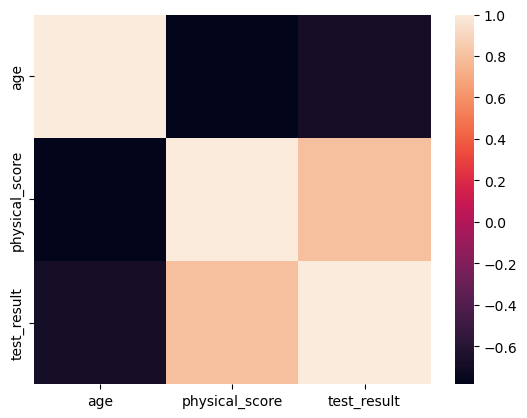

In [99]:
sns.heatmap(df.corr());

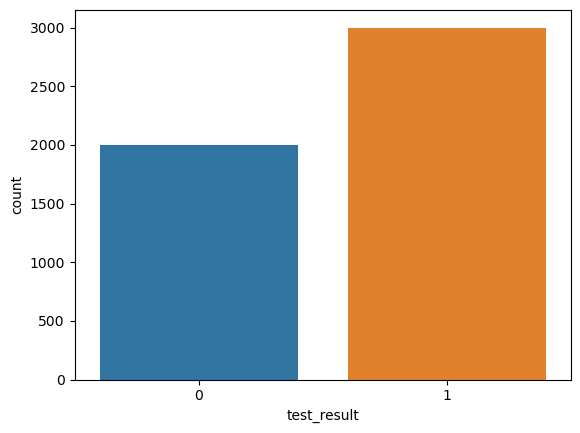

In [100]:
sns.countplot(df,x='test_result');

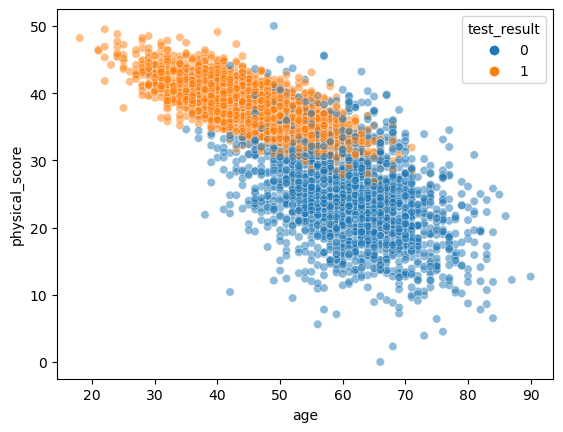

In [101]:
sns.scatterplot(df,x='age',y='physical_score',hue='test_result',alpha=0.5);

## Model
# Splitting the data into Training and Testing

In [118]:
X=df.drop('test_result',axis=1)
y=df['test_result']

In [119]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score,mean_absolute_error,mean_squared_error,confusion_matrix,classification_report
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [120]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=101)

In [121]:
X_train

,age,physical_score
2654,52.0,27.3
2468,51.0,35.5
290,52.0,35.5
1463,43.0,37.8
4508,28.0,43.2
...,...,...
4171,71.0,16.4
599,54.0,35.7
1361,65.0,21.2
1547,83.0,24.1


# Logistic Regression

In [122]:
model=LogisticRegression(max_iter=10000,random_state=101)
from sklearn.metrics import accuracy_score,mean_absolute_error,mean_squared_error,confusion_matrix,classification_report
param_grid={'C':[1,5,8,10],'solver':['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga']}
grid=GridSearchCV(estimator=model,param_grid=param_grid)

In [123]:
def run_model(grid,X_train,X_test,y_train,y_test):
    grid.fit(X_train,y_train)
    pred=grid.predict(X_test)
    error=1-accuracy_score(y_test,pred)
    print(f"Error : {error}")
    print(classification_report(y_test,pred))
    print(f"Accuracy score : {accuracy_score(y_test,pred)}")

In [124]:
run_model(grid,X_train,X_test,y_train,y_test);

Error : 0.08066666666666666
              precision    recall  f1-score   support

           0       0.93      0.86      0.89       597
           1       0.91      0.96      0.93       903

    accuracy                           0.92      1500
   macro avg       0.92      0.91      0.91      1500
weighted avg       0.92      0.92      0.92      1500

Accuracy score : 0.9193333333333333


# K Neighbors Classifier

In [125]:
model_knn=KNeighborsClassifier(n_neighbors=5,leaf_size=5)
param_grid={'weights': ['uniform', 'distance'], 'algorithm' : ['auto', 'ball_tree','kd_tree', 'brute']}
grid_knn=GridSearchCV(estimator=model_knn,param_grid=param_grid)

In [126]:
run_model(grid=grid_knn,X_train=X_train,X_test=X_test,y_train=y_train,y_test=y_test);

Error : 0.07399999999999995
              precision    recall  f1-score   support

           0       0.94      0.87      0.90       597
           1       0.92      0.96      0.94       903

    accuracy                           0.93      1500
   macro avg       0.93      0.92      0.92      1500
weighted avg       0.93      0.93      0.93      1500

Accuracy score : 0.926


## Decision Tree 

In [127]:
model_decision_trees=DecisionTreeClassifier(random_state=101)
param_grid={'criterion':['gini', 'entropy', 'log_loss'],'splitter':['best', 'random'],'max_depth':[1,5,8,10],'max_leaf_nodes':list(range(2,5))}
grid_dt=GridSearchCV(estimator=model_decision_trees,param_grid=param_grid)
grid_dt.fit(X_train,y_train)

GridSearchCV(estimator=DecisionTreeClassifier(random_state=101),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [1, 5, 8, 10],
                         'max_leaf_nodes': [2, 3, 4],
                         'splitter': ['best', 'random']})

In [128]:
grid_dt.best_params_

{'criterion': 'gini', 'max_depth': 5, 'max_leaf_nodes': 4, 'splitter': 'best'}

In [129]:
run_model(grid=grid_dt,X_train=X_train,X_test=X_test,y_train=y_train,y_test=y_test);

Error : 0.07266666666666666
              precision    recall  f1-score   support

           0       0.97      0.85      0.90       597
           1       0.91      0.98      0.94       903

    accuracy                           0.93      1500
   macro avg       0.94      0.91      0.92      1500
weighted avg       0.93      0.93      0.93      1500

Accuracy score : 0.9273333333333333


# Random Forest

In [130]:
model_rf=RandomForestClassifier(n_estimators=100,random_state=101)
param_grid={'criterion':['gini', 'entropy', 'log_loss'],'max_depth':[1,5,8,10],'max_leaf_nodes':list(range(2,5))}
grid_rf=GridSearchCV(estimator=model_rf,param_grid=param_grid)

In [131]:
run_model(grid=grid_rf,X_train=X_train,X_test=X_test,y_train=y_train,y_test=y_test);

Error : 0.07533333333333336
              precision    recall  f1-score   support

           0       0.97      0.84      0.90       597
           1       0.90      0.98      0.94       903

    accuracy                           0.92      1500
   macro avg       0.94      0.91      0.92      1500
weighted avg       0.93      0.92      0.92      1500

Accuracy score : 0.9246666666666666


# Adaboost

In [132]:
model_boost=AdaBoostClassifier(random_state=101)
param_grid={'n_estimators':[1,5,8,10,50,80,100],'random_state':[1,5,8,10,50,42,101]}
grid_boost=GridSearchCV(estimator=model_boost,param_grid=param_grid)
grid_boost.fit(X_train,y_train)

GridSearchCV(estimator=AdaBoostClassifier(random_state=101),
             param_grid={'n_estimators': [1, 5, 8, 10, 50, 80, 100],
                         'random_state': [1, 5, 8, 10, 50, 42, 101]})

In [133]:
run_model(grid=grid_boost,X_train=X_train,X_test=X_test,y_train=y_train,y_test=y_test);

Error : 0.07599999999999996
              precision    recall  f1-score   support

           0       0.96      0.84      0.90       597
           1       0.90      0.98      0.94       903

    accuracy                           0.92      1500
   macro avg       0.93      0.91      0.92      1500
weighted avg       0.93      0.92      0.92      1500

Accuracy score : 0.924


# Gradient Boost

In [134]:
model_gboost=GradientBoostingClassifier(random_state=101)
param_grid={'loss':['log_loss','exponential'],'n_estimators':[1,5,8,10,50,80,100],'random_state':[1,5,8,10,50,42,101],'criterion':['friedman_mse', 'squared_error']}
grid_gboost=GridSearchCV(estimator=model_gboost,param_grid=param_grid)
grid_gboost.fit(X_train,y_train);

In [135]:
run_model(grid=grid_gboost,X_train=X_train,X_test=X_test,y_train=y_train,y_test=y_test);

Error : 0.06799999999999995
              precision    recall  f1-score   support

           0       0.97      0.86      0.91       597
           1       0.91      0.98      0.95       903

    accuracy                           0.93      1500
   macro avg       0.94      0.92      0.93      1500
weighted avg       0.93      0.93      0.93      1500

Accuracy score : 0.932


# Support Vector Classifier

In [136]:
model_svc=SVC(random_state=101)
param_grid={'C':list(range(1,10)),'kernel':['linear', 'poly', 'rbf']}
grid_svc=GridSearchCV(estimator=model_svc,param_grid=param_grid)

In [137]:
run_model(grid=grid_svc,X_train=X_train,X_test=X_test,y_train=y_train,y_test=y_test);

Error : 0.06466666666666665
              precision    recall  f1-score   support

           0       0.97      0.87      0.91       597
           1       0.92      0.98      0.95       903

    accuracy                           0.94      1500
   macro avg       0.94      0.92      0.93      1500
weighted avg       0.94      0.94      0.93      1500

Accuracy score : 0.9353333333333333


In [138]:
accuracyscores=[0.9193333333333333,0.926,0.9273333333333333,0.9246666666666666,0.924,0.932,0.9353333333333333]
err=[0.08066666666666666,0.07399999999999995,0.07266666666666666,0.07533333333333336,0.07599999999999996,0.06799999999999995,0.06466666666666665]
model1=['Logistic Regression','Knn Classifier','Decision Tree Classifier','Random Forest Classifier','AdaboostCLassifier','GradientBoostClassifier','SupportVectorClassifier']

In [139]:
data={'Model': model1, 'Accuracy Score': accuracyscores, 'Error': err}

In [140]:
model_data=pd.DataFrame(data=data,index=range(1,len(model1)+1))
model_data

,Model,Accuracy Score,Error
1,Logistic Regression,0.919333,0.080667
2,Knn Classifier,0.926000,0.074000
3,Decision Tree Classifier,0.927333,0.072667
4,Random Forest Classifier,0.924667,0.075333
5,AdaboostCLassifier,0.924000,0.076000
6,GradientBoostClassifier,0.932000,0.068000
7,SupportVectorClassifier,0.935333,0.064667


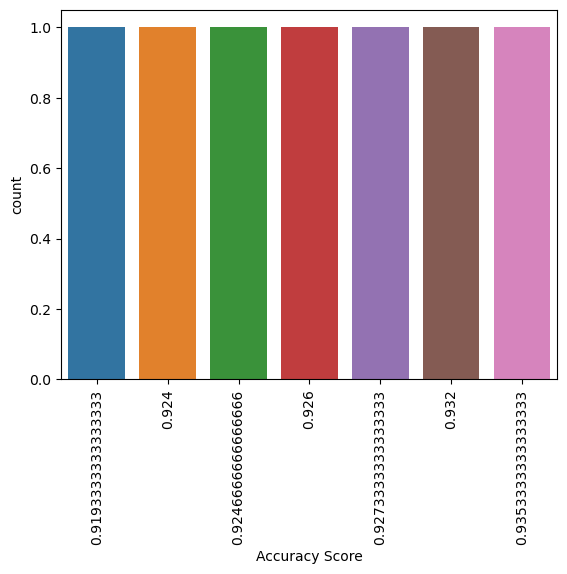

In [141]:
sns.countplot(model_data,x='Accuracy Score');
plt.xticks(rotation=90);

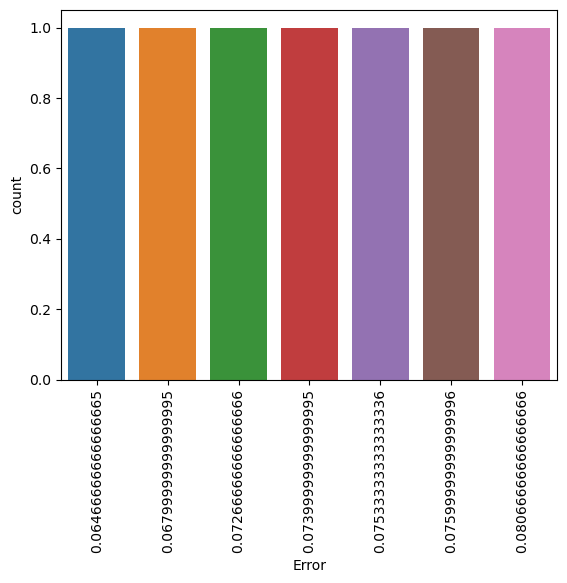

In [142]:
sns.countplot(model_data,x='Error');
plt.xticks(rotation=90);

In [143]:
new_data=[[80,40]]
grid_svc.fit(X_train,y_train)
grid_svc.predict(new_data)

C:\Users\Dell\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


array([0], dtype=int64)

In [144]:
from tkinter import *
from tkinter import messagebox
from PIL import Image, ImageTk
root=Tk()
root.configure(background="light grey")
root.geometry("900x550")
featurenames=['age','physical_score']
image=Image.open("Hearing-test.png")
image = image.resize((500, 500))
tk_image=ImageTk.PhotoImage(image)
root.title("Model")
def predict():
    try:
        age_input=int(entry_age.get())
        physical_score=int(entry_score.get())
        new_data=np.array([[age_input,physical_score]])
        p=grid_svc.predict(new_data)
        print(p)
    except ValueError as e:
        messagebox.showerror("Error", "Please enter valid numerical values for age and physical score.")
        print("ValueError:", e)
    except Exception as e:
        messagebox.showerror("Error", "An error occurred while predicting. Please check your input.")
        print("Error:", e)

age=Label(root,text="Enter your age (18-55)",font="Lucida 13 bold",bg="light grey")
score=Label(root,text="Enter your score (0-50)",font="Lucida 13 bold",bg="light grey")
image_label = Label(root,image=tk_image)

age.grid(row=2,column=0)
score.grid(row=3,column=0)
image_label.grid(row=10,column=1)


agetype=IntVar(value=None)
scoretype=IntVar(value=None)

In [145]:
entry_age=Entry(root,textvariable=agetype)
entry_score=Entry(root,textvariable=scoretype)
entry_age.grid(row=2,column=1)
entry_score.grid(row=3,column=1)

In [146]:
button=Button(root,text="Predict",command=predict)
button.grid(row=4,column=1)

In [147]:
root.mainloop()